<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/chapter_HA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.8 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

closed loop TF =  
                                  128
-----------------------------------------------------------------------
s^8 + 3 s^7 + 10 s^6 + 24 s^5 + 48 s^4 + 96 s^3 + 128 s^2 + 192 s + 128

Poles =  [ 1.00000000e+00+1.73205081j  1.00000000e+00-1.73205081j
  2.49800181e-16+2.j          2.49800181e-16-2.j
 -1.00000000e+00+1.73205081j -1.00000000e+00-1.73205081j
 -2.00000000e+00+0.j         -1.00000000e+00+0.j        ]
Zeros =  []


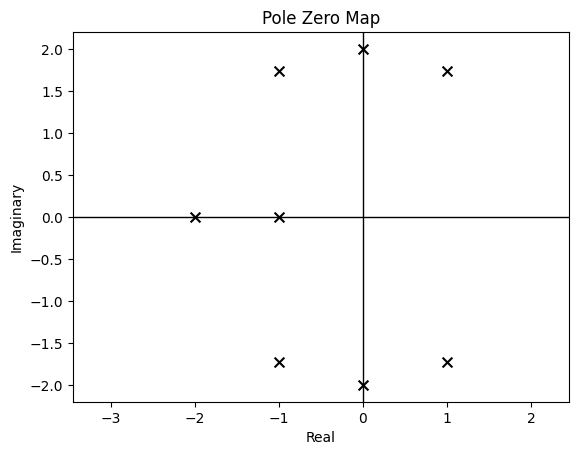

In [4]:
# Define your transfer function:
#T(s) = 128 / (s^8+3s^7+10s^6+24s^5+48s^4+96s^3+128s^2+192s+128)
num = [128]
den = [1, 3, 10, 24, 48, 96, 128, 192, 128]

TF = tf(num,den)

print ("closed loop TF = ", TF)

(p,z) = pzmap(TF)
print("Poles = ",p)
print("Zeros = ",z)

plt.savefig ("poles_zeros.pdf")

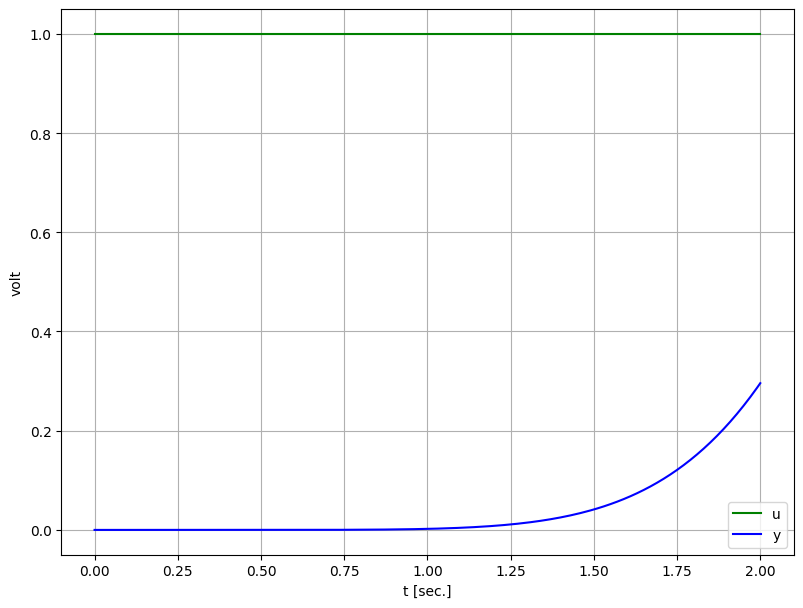

In [6]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 2
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")

State Space Representation:
A matrix: 
 [[-3. -2. -3.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
B matrix: 
 [[1.]
 [0.]
 [0.]]
C matrix: 
 [[0. 0. 3.]]
D matrix: 
 [[0.]]


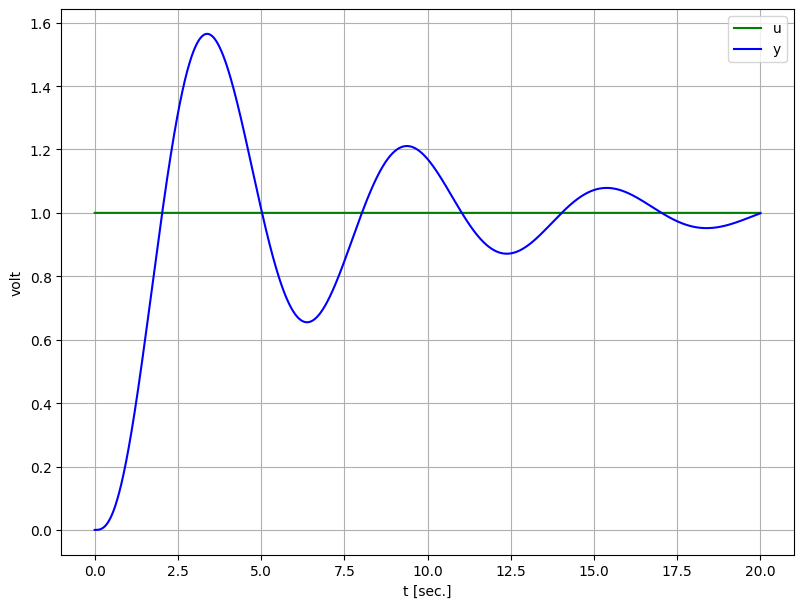

In [ ]:
# Convert to State Space
sys = tf2ss(TF)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print("State Space Representation:")
print("A matrix: \n", A)
print("B matrix: \n", B)
print("C matrix: \n", C)
print("D matrix: \n", D)

# Simulation :
(t, y) = forced_response(sys, T=t, U=u, X0=0)

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")

3
(2001,)


<ipython-input-84-a2bdbf1a1d0a>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplot[i] = y


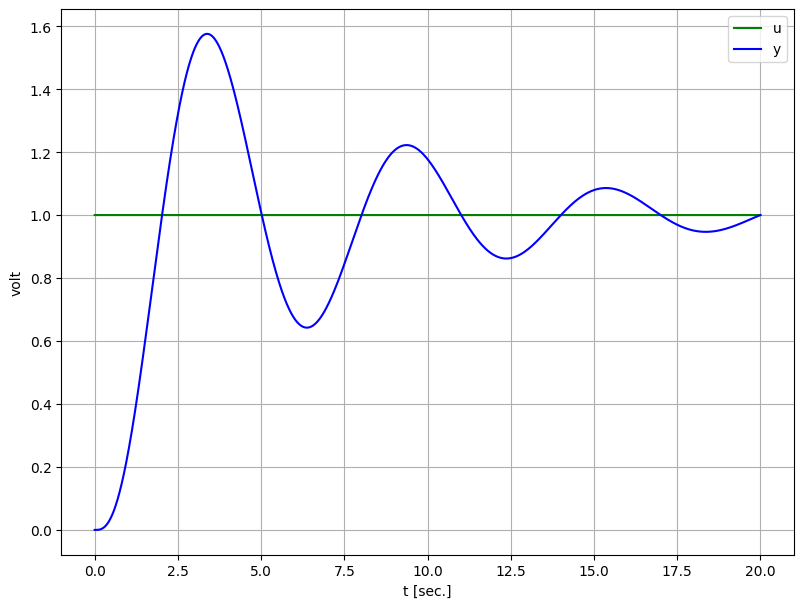

In [ ]:
sys = tf2ss(G)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print(A.shape[0])

# Simulate in a "for" loop
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

r = 1 * np.ones(nt)  # Reference input

# controller parameters
kp = 1.0
ki = 0.0
u = 0.0

x = np.zeros([A.shape[0],1])
yplot = np.zeros(nt)
print(yplot.shape)
sum_e = 0

for i in range(nt):
  # state space model
  xdot=np.dot(A, x)+np.dot(B,u)
  x = x + xdot*dt
  y = np.dot(C,x)+np.dot(D,u)

  # controller
  e = r[i] - y
  u = kp * e + ki * sum_e
  sum_e = sum_e + e

  yplot[i] = y

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, yplot, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")